<a href="https://colab.research.google.com/github/khoa2210/KHDL/blob/main/BT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thống kê mô tả

Thư viện

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [47]:
from google.colab import files
uploaded = files.upload()


Saving BT.csv to BT.csv


In file

In [48]:
df = pd.read_csv("BT.csv")
df

,Year,HSG-TT,Học bổng,Học lại
0,2017,45,18,15
1,2018,32,21,18
2,2019,40,11,12


Làm sạch dữ liệu

In [49]:
df.info()
print(df.columns)
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Year      3 non-null      int64
 1   HSG-TT    3 non-null      int64
 2   Học bổng  3 non-null      int64
 3   Học lại   3 non-null      int64
dtypes: int64(4)
memory usage: 224.0 bytes
Index(['Year ', 'HSG-TT', 'Học bổng', 'Học lại'], dtype='object')


Year        False
HSG-TT      False
Học bổng    False
Học lại     False
dtype: bool

Phân tích xu hướng tập trung của trung tâm dữ liệu

Giá trị trung bình 

In [50]:
pd.DataFrame(df.mean().T)

,0
Year,2018.000000
HSG-TT,39.000000
Học bổng,16.666667
Học lại,15.000000



Giá trị trung vị tập dữ liệu

In [51]:
pd.DataFrame(df.median().T)

,0
Year,2018.0
HSG-TT,40.0
Học bổng,18.0
Học lại,15.0


Giá trị yếu vị 

In [87]:
pd.DataFrame(df.mode().T)

,0,1,2
Year,2017,2018,2019
HSG-TT,32,40,45
Học bổng,11,18,21
Học lại,12,15,18


Phương pháp phân tích sự thay đổi, phân tán của tập dữ liệu

Phạm vi (Độ biến thiên) của dữ liệu

In [52]:
min = df.min (numeric_only= True)
max = df.max (numeric_only= True) 
f = pd.DataFrame(max - min)
f

,0
Year,2
HSG-TT,13
Học bổng,10
Học lại,6


Phương sai của dữ liệu

In [53]:
a = pd.DataFrame(df.var(skipna= True).T)
a

,0
Year,1.000000
HSG-TT,43.000000
Học bổng,26.333333
Học lại,9.000000


Độ lệch chuẩn dữ liệu

In [54]:
b = pd.DataFrame(df.std(skipna= True).T)
b

,0
Year,1.000000
HSG-TT,6.557439
Học bổng,5.131601
Học lại,3.000000


Hệ số biến động

In [85]:
cv = df.std()/df.mean()
pd.DataFrame(cv)

,0
Year,0.000496
HSG-TT,0.168139
Học bổng,0.307896
Học lại,0.200000


Mối tương quan giữa các cặp dữ liệu Bảng thống kê mức độ phụ thuộc của từng tập dữ liệu trong data

In [55]:
corr = df.corr()
corr

,Year,HSG-TT,Học bổng,Học lại
Year,1.000000,-0.381246,-0.682048,-0.500000
HSG-TT,-0.381246,1.000000,-0.416046,-0.609994
Học bổng,-0.682048,-0.416046,1.000000,0.974355
Học lại,-0.500000,-0.609994,0.974355,1.000000


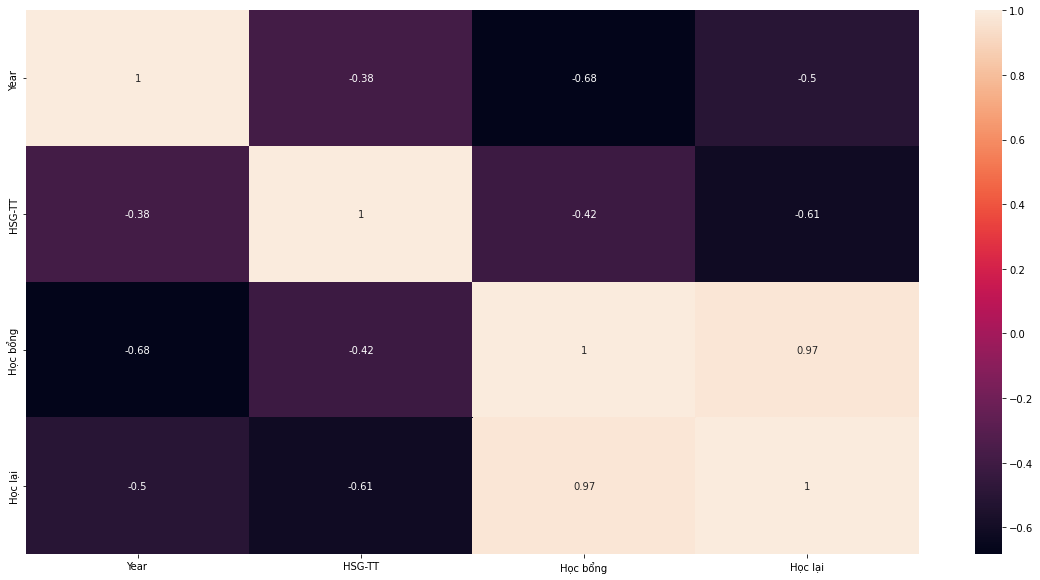

In [84]:
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

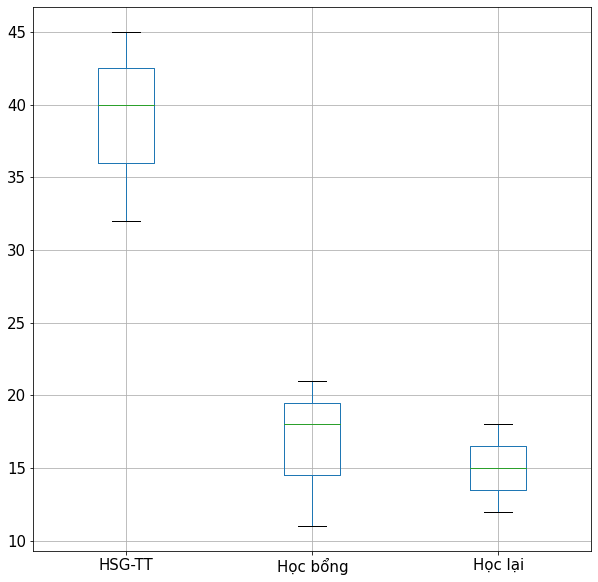

In [60]:
boxplot = df.boxplot(column=['HSG-TT', 'Học bổng', 'Học lại'],fontsize= 15 ,figsize=(10,10))

In [78]:
plotdata = pd.DataFrame({
    "Năm_2017":[45, 18, 15,22],
    "Năm_2018":[32, 21, 18,29],
    "Năm_2029":[40, 11, 12,37]
    }, 
    index=["HSG", "HB", "HL","CL"]
)
plotdata.head()

,Năm_2017,Năm_2018,Năm_2029
HSG,45,32,40
HB,18,21,11
HL,15,18,12
CL,22,29,37


Text(0, 0.5, 'Percent')

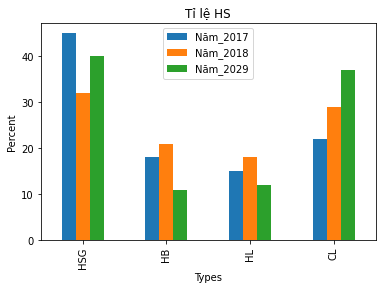

In [79]:
plotdata.plot(kind="bar")
plt.title("Tỉ lệ HS")
plt.xlabel("Types")
plt.ylabel("Percent")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f5d81450>,
      dtype=object)

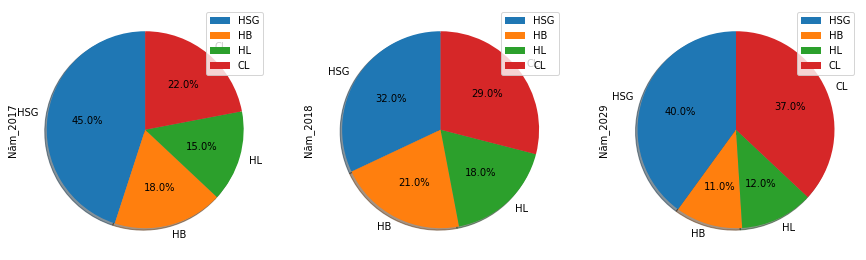

In [83]:
plotdata.plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')